In [1]:
### This project essentially captures a search feature for audio files.
### The following program allows you to search for a particular sound (series of sound)
### from the file you wanted to search for.

In [2]:
from scipy import fft, arange, signal
from scipy.special import logit, expit
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from ttictoc import TicToc

In [3]:
def read_file(path):
    """
    Reads the audio .wav file and returns the sample rate and data contents of the file.
    """
    sr, signal = wavfile.read(path)
    return sr, signal[:,0]

In [4]:
sample_rate, signal = read_file("Animals,  Shazam Project Test.wav")

In [5]:
21*44100

926100

In [78]:
signal.max(), len(signal), len(signal)/sample_rate

(32767, 5435689, 113.24352083333333)

In [79]:
sample_rate_3, signal_3 = read_file("Martin Garrix - Animals (test#1).wav")
sample_rate_4, signal_4 = read_file("Thinking out Loud.wav")

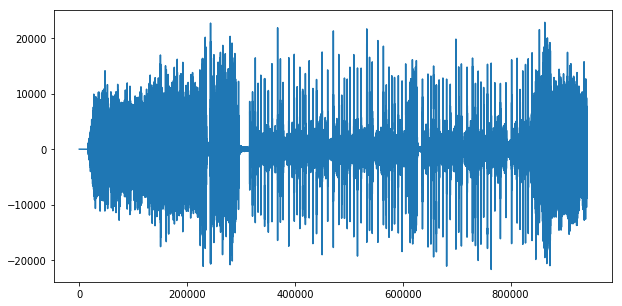

In [7]:
sample_rate_2, signal_2 = read_file("Animals, batch test 1.wav")
plt.figure(figsize=(10,5))
plt.plot(signal_2)

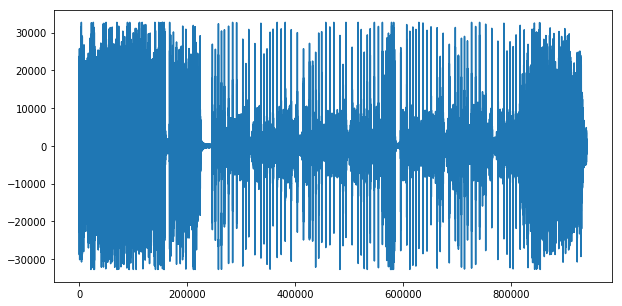

In [8]:
import math
plt.figure(figsize=(10,5))
plt.plot(signal[math.floor((78.9-21.3)*44100):math.floor(78.9*44100)])

In [9]:
len(signal)/float(sample_rate)

113.24352083333333

In [10]:
def frequency_sepectrum(sf, x):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

In [11]:
def plot(sample_rate, signal):
    frq, Y = frequency_sepectrum(sample_rate, signal)
    frq = frq
    Y = Y
    plt.plot(frq, Y)
    return Y, frq

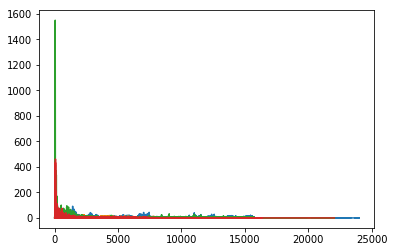

In [81]:
Y, X = plot(sample_rate, signal)
Y_2, X_2 = plot(sample_rate_2, signal_2)
Y_3, X_3 = plot(sample_rate_3, signal_3)
Y_4, X_4 = plot(sample_rate_4, signal_4)

In [13]:
X.max(), X_2.max(), X.argmin()

(23999.98675420908, 22049.953137751632, 0)

In [112]:
def percent_calculator(A, B):
    percent = []
    A = A + np.linalg.norm(A)
    B = B + np.linalg.norm(B)
    for a,b in zip(A, B):
        percent.append(abs(a-b))
    tots = sum(percent)/(np.linalg.norm(A))
    return np.array(percent), tots

In [117]:
"""
percent_1, sigma_1 = percent_calculator(X, X_2) # Animals, Batch File.
percent_2, sigma_2 = percent_calculator(X, X_3) # martin Garrix, orginial
percent_3, sigma_3 = percent_calculator(X, X_4) # Thinking out loud
"""
percent_1, sigma_1 = percent_calculator(X_2, X) # Animals, Samsung full song
percent_2, sigma_2 = percent_calculator(X_2, X_3)# martin Garrix, orginial
percent_3, sigma_3 = percent_calculator(X_2, X_4)# Thinking out loud

In [118]:
sigma_1, sigma_2, sigma_3

(124.7894667801025, 155.38625978151205, 517.6938750658026)

In [111]:
max(sigma_1, sigma_2, sigma_3)

5678315283.640092

In [189]:
x_1 = expit(Y)
x_2 = expit(Y_2)

In [224]:
44100/2

22050.0

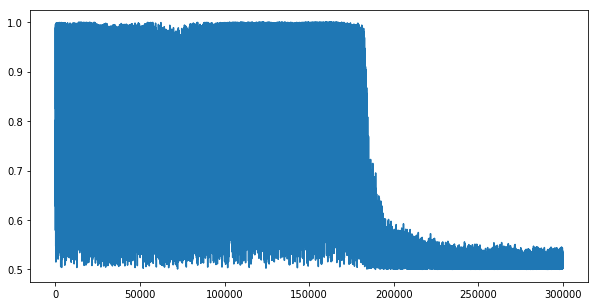

In [238]:
plt.figure(figsize=(10,5))
plt.plot(x_1[1600000:1900000])

893650

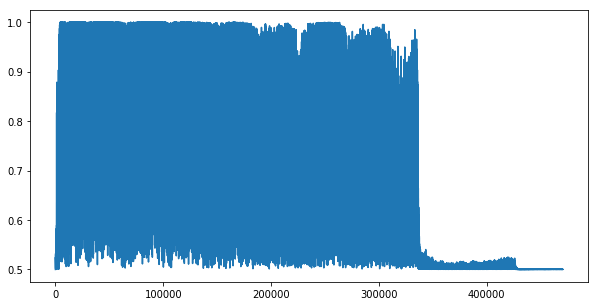

In [232]:
plt.figure(figsize=(10,5))
plt.plot(x_2)
53*22050-275000

In [134]:
x.shape

(470528,)

In [135]:
pos = -1;
y = x[x.argmax():]
for i in range(len(y)):
    if(y[i] - 0.5 < 1e-6):
        pos = i
        break

In [136]:
new_x = x[:pos]

In [137]:
new_x.shape, x.shape

((470527,), (470528,))

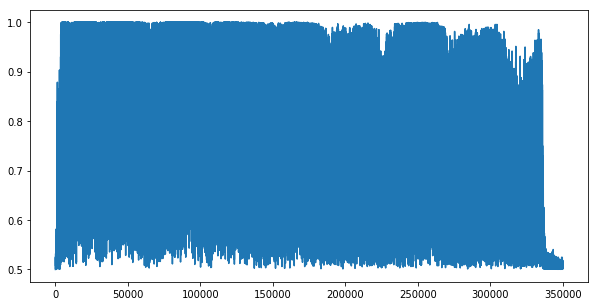

In [138]:
plt.figure(figsize=(10,5))
plt.plot(new_x[:350000])